In [10]:
from sklearn.linear_model import SGDRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn import svm

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [35]:
def fact_rize(test_data):
    t_data=test_data.copy()
    label_mapping = {}
    t_data['job'], label_mapping['job'] = pd.factorize(t_data['job'])
    t_data['marital'], label_mapping['marital'] = pd.factorize(t_data['marital'])
    t_data['education'], label_mapping['education'] = pd.factorize(t_data['education'])
    t_data['default'], label_mapping['default'] = pd.factorize(t_data['default'])
    t_data['housing'], label_mapping['housing'] = pd.factorize(t_data['housing'])
    t_data['loan'], label_mapping['loan'] = pd.factorize(t_data['loan'])
    print('label_mapping is  : ',label_mapping)
    return t_data

In [38]:
def split_data(test_data,imp_var,n):
    
    #Copying the orignial Data 
    t_data=test_data.copy()
    
    y = t_data[imp_var]
    ytest=y[y==n]
    ytrain=y[-(y==n)]
    
    Xtest=(t_data[t_data[imp_var]==n]).drop(imp_var, axis=1)
    Xtrain=(t_data[-(t_data[imp_var]==n)]).drop(imp_var, axis=1)

    return ytest,ytrain,Xtest,Xtrain

In [51]:
def rand_forest(Xtrain,ytrain,Xtest):  
    clf = RandomForestClassifier()
    clf.fit(Xtrain, np.asarray(list(pd.factorize(ytrain)))[0])
    clf.feature_importances_
    
    fig, ax = plt.subplots(figsize=(25,12))
    ax.bar(Xtrain.columns,clf.feature_importances_)
    pred_ = clf.predict((Xtest))
    return pred_

In [47]:
def new_split_c(C,Xtrain,Xtest):
    Xtrain = Xtrain[C]
    Xtest = Xtest[C]
    return Xtrain, Xtest
        

In [92]:
def convert_pred(par,pred):
    mappping = {'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
           'retired', 'management', 'unemployed', 'self-employed', 'unknown',
           'entrepreneur', 'student'], 'marital': ['married', 'single', 'divorced', 'unknown'], 'education': ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
           'professional.course', 'unknown', 'university.degree', 'illiterate'], 'default': ['no', 'unknown', 'yes'], 'housing': ['no', 'yes', 'unknown'], 'loan': ['no', 'yes', 'unknown']}
    pred_ret=[]
    for i in range (0,len(pred)):
        for j in range(0,len(mappping[par])):
            if(pred[i]==j):
                pred_ret.append(mappping[par][j])
    
    return pred_ret

In [119]:
data = pd.read_csv('C:/Trinity/Comp Sc/ML/Datasets/bank-additional/bank-additional-full.csv',sep=';')
data['id'] = data.index
original_data = data

In [120]:
original_data = data.copy()

In [121]:
#Removing 3 or more unknowns in a row

count_row_unknown = 0
id = []
for i in range(len(original_data)-1):
    count_unknown = 0
    for j in range(20):
        if original_data.iloc[i][j]=='unknown':
            count_unknown += 1
    if count_unknown>=3:
        count_row_unknown += 1
        print(count_row_unknown)
        id.append(original_data.iloc[i]['id'])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [124]:
filtered_data = original_data[~original_data['id'].isin(id)].copy()

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}
label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4

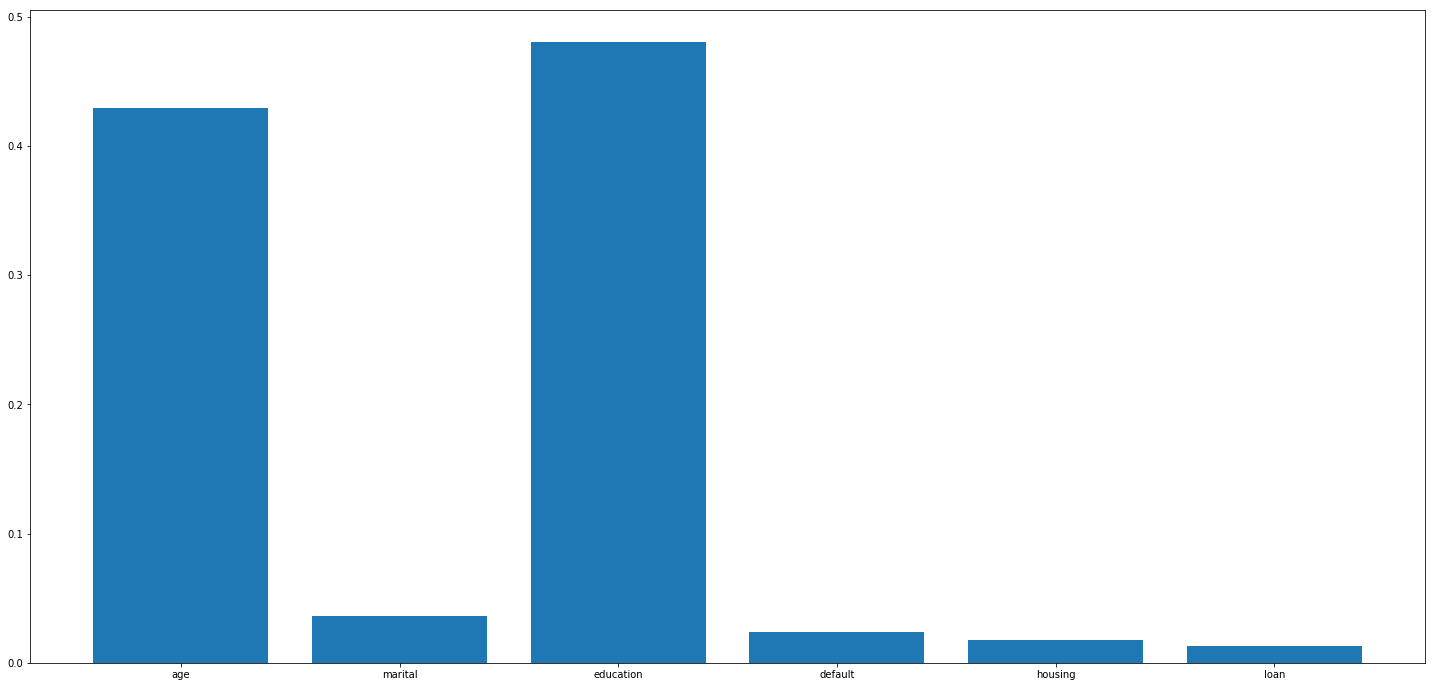

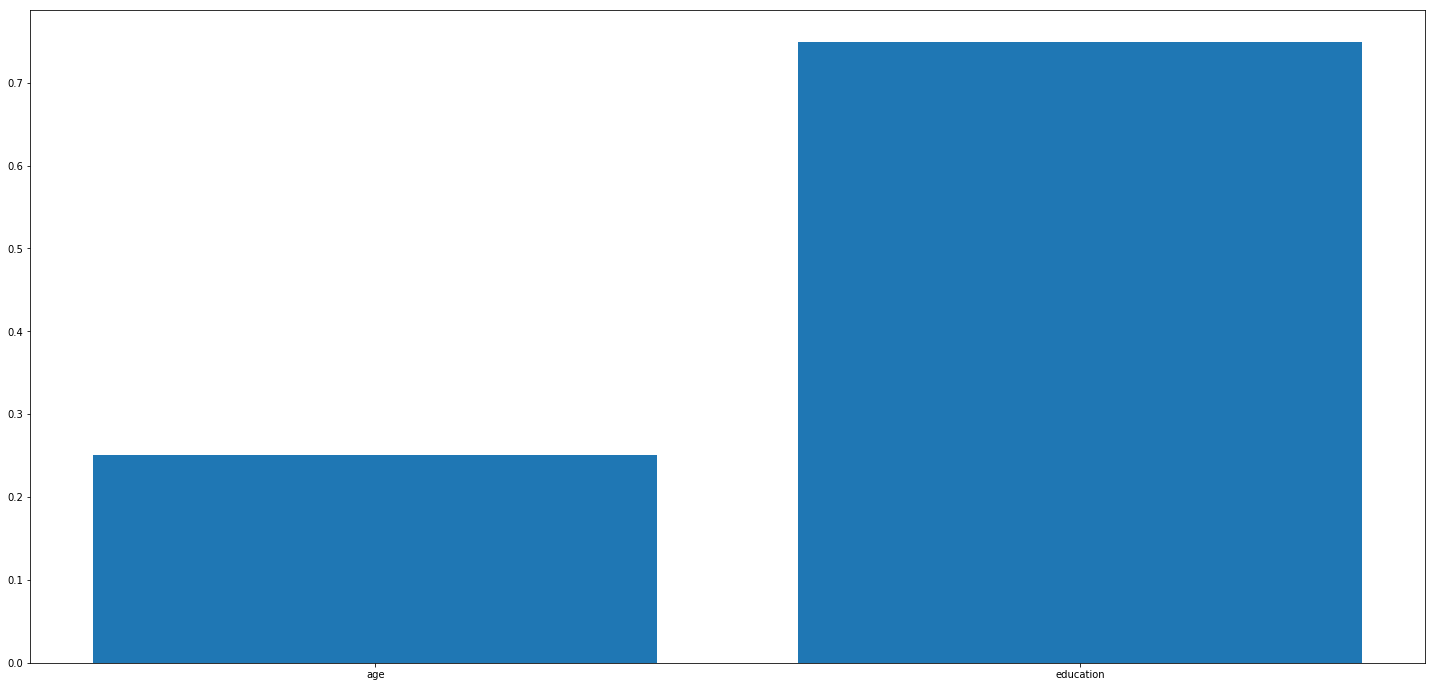

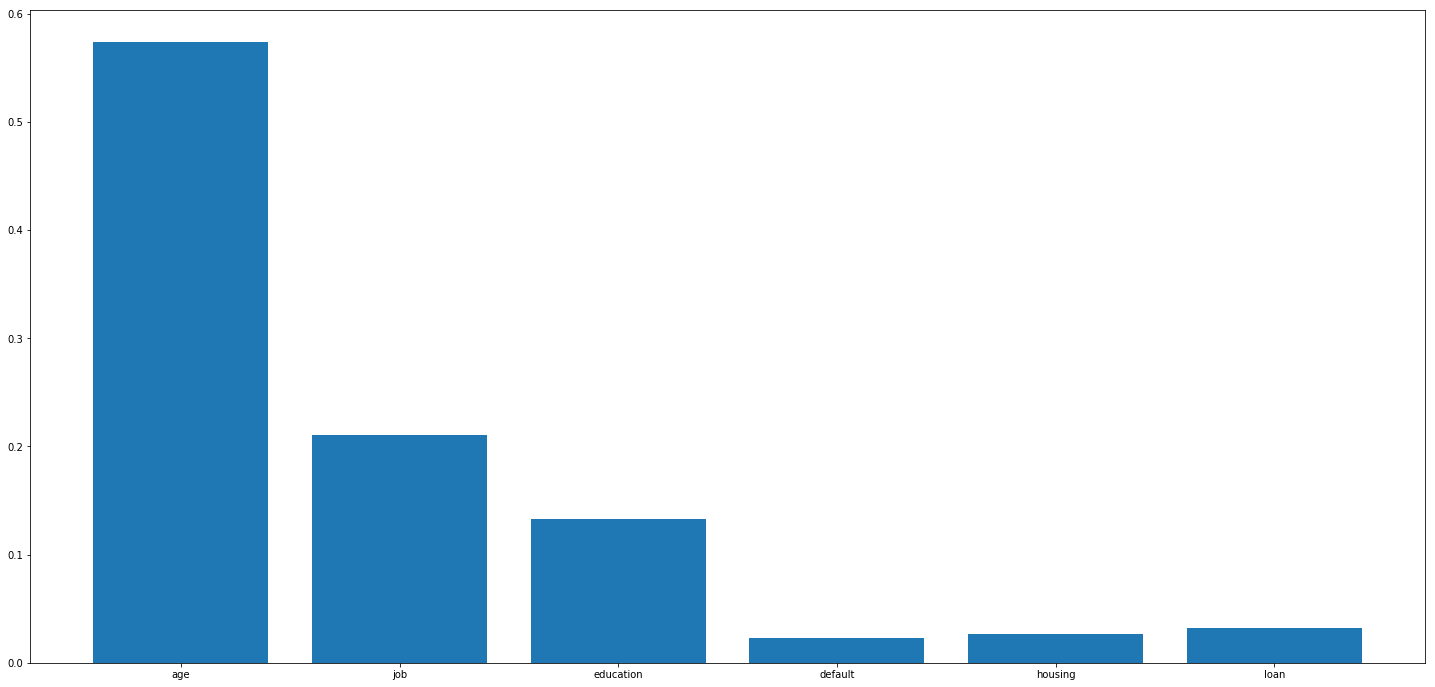

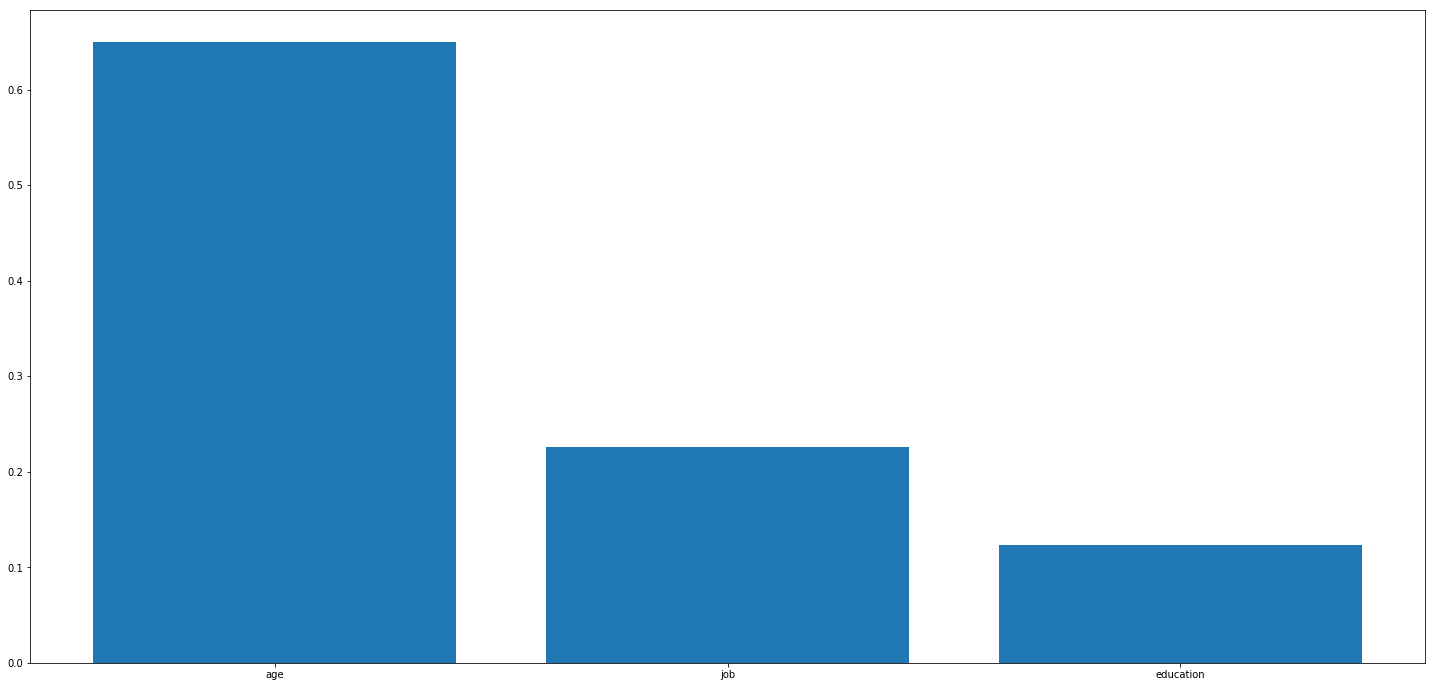

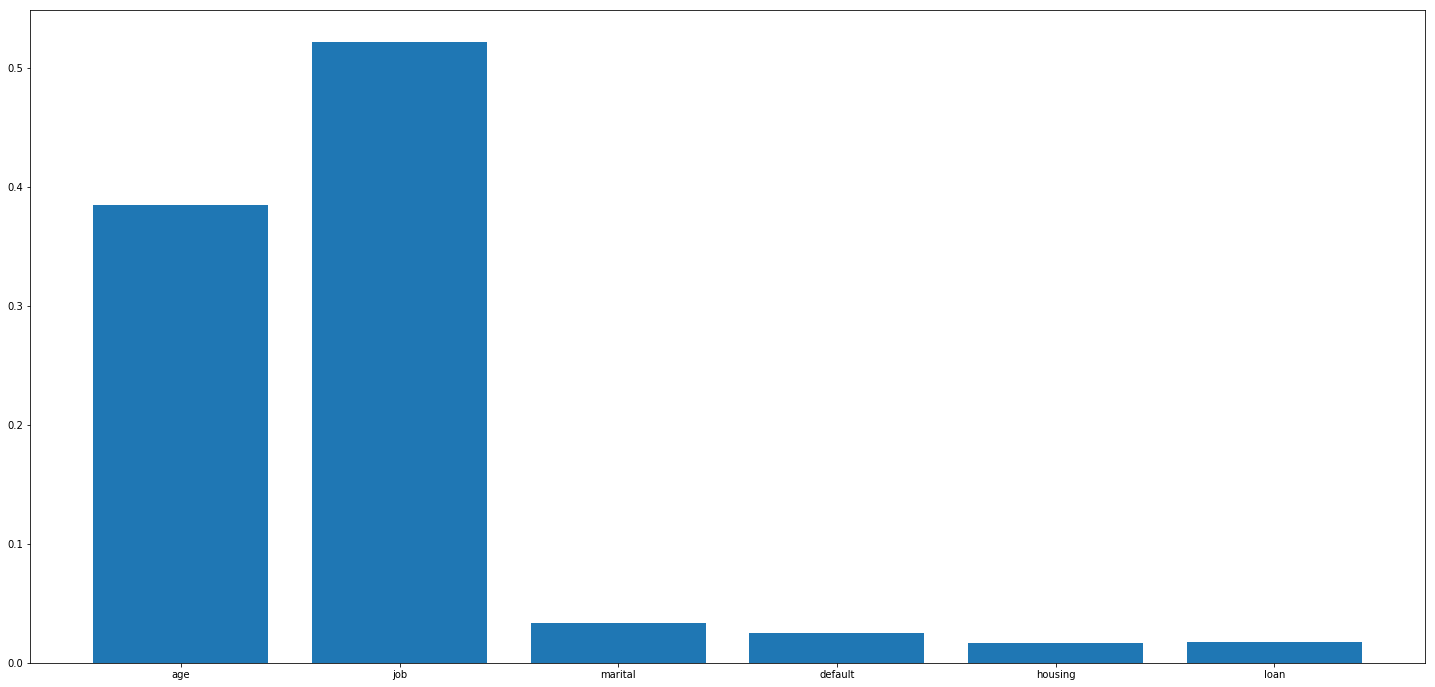

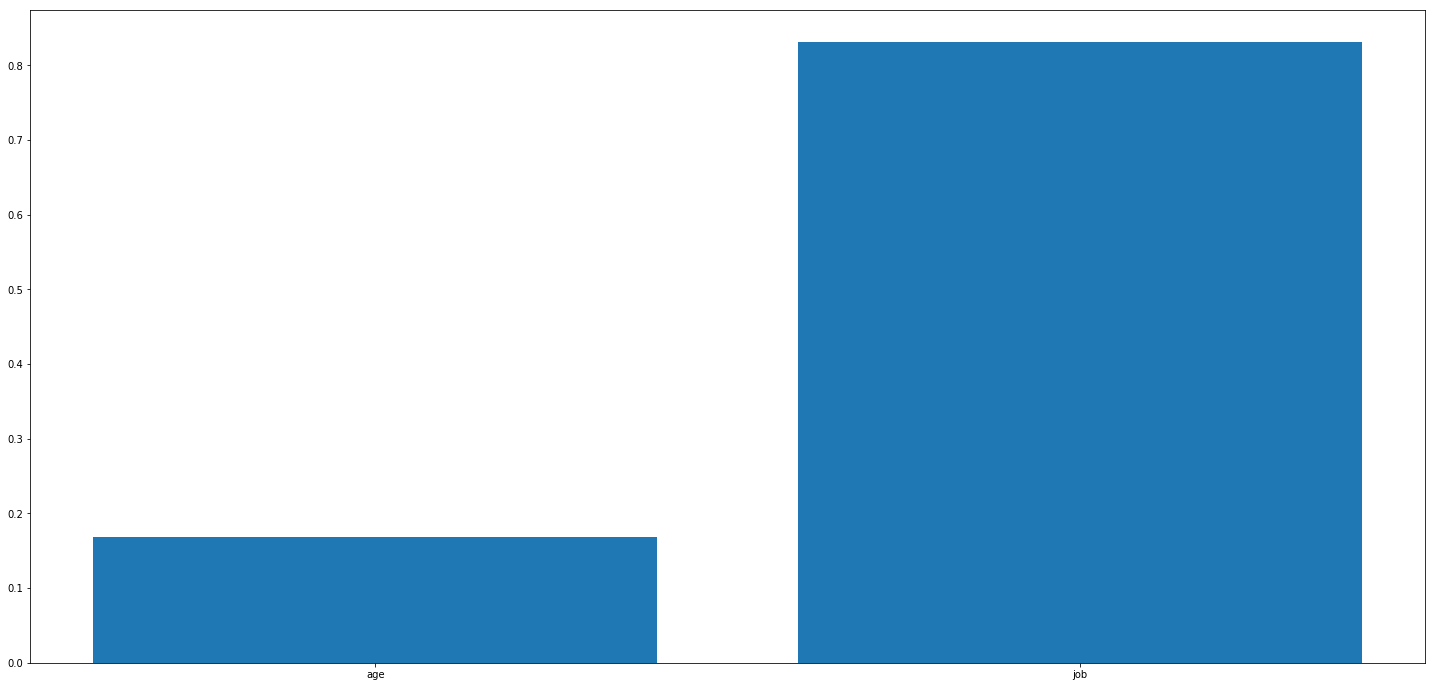

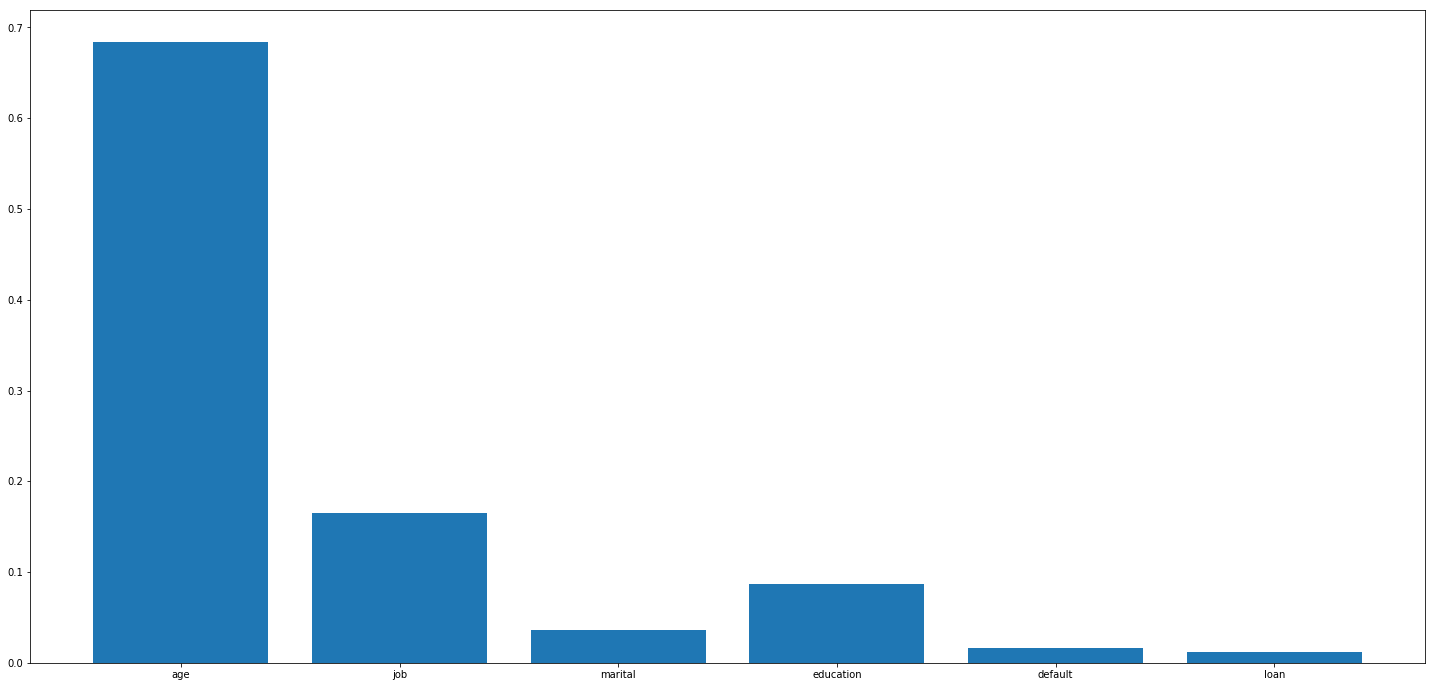

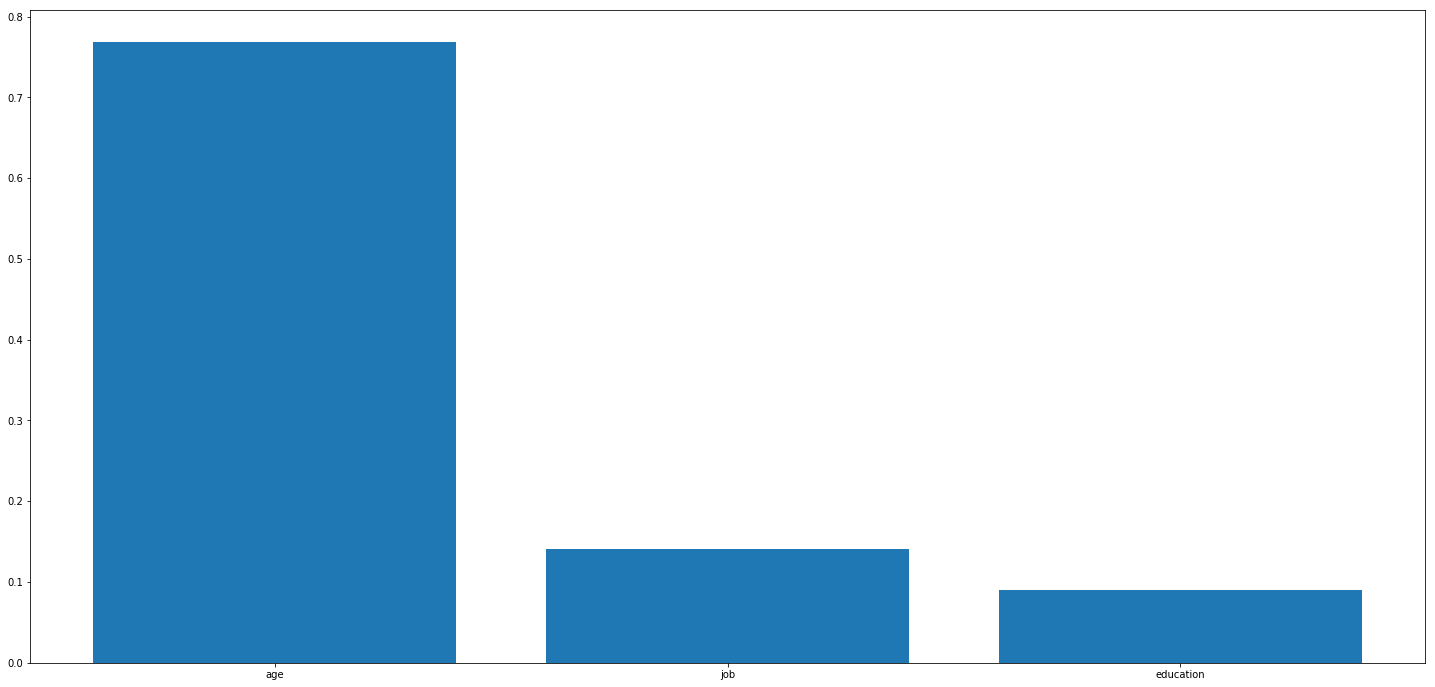

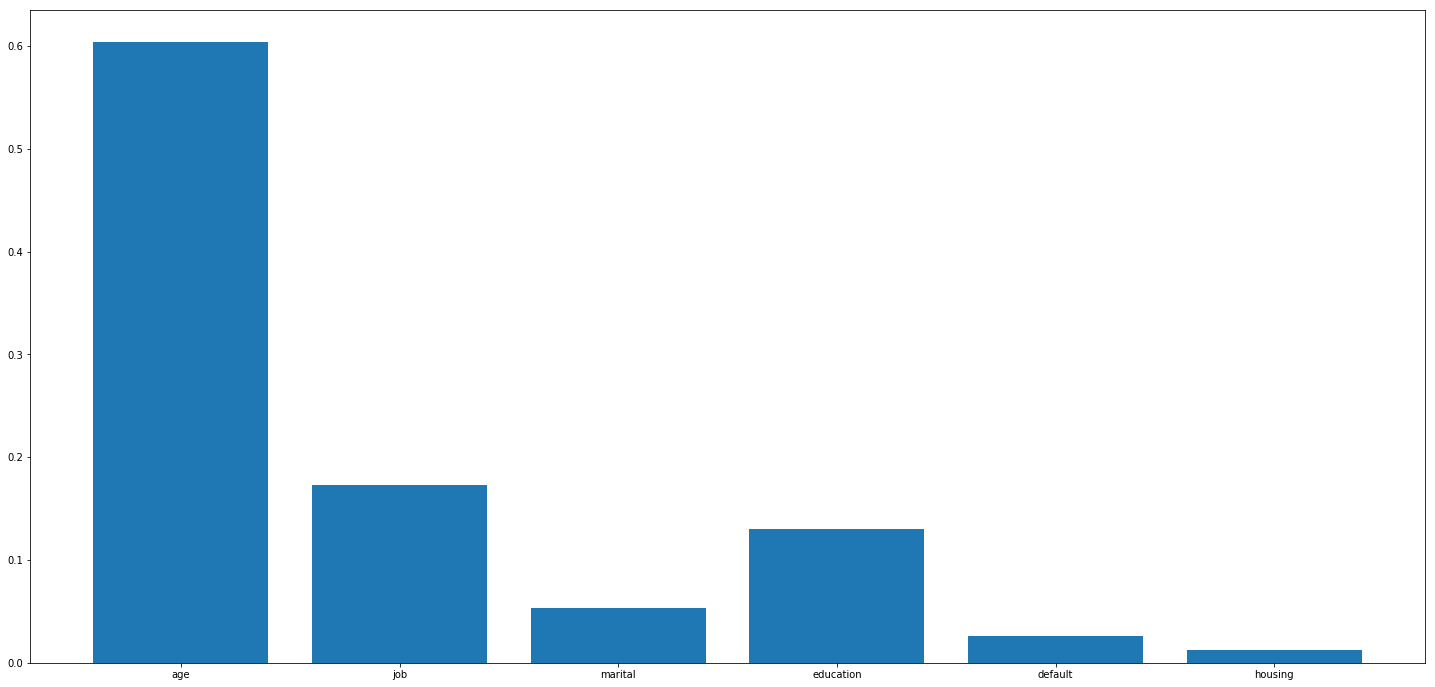

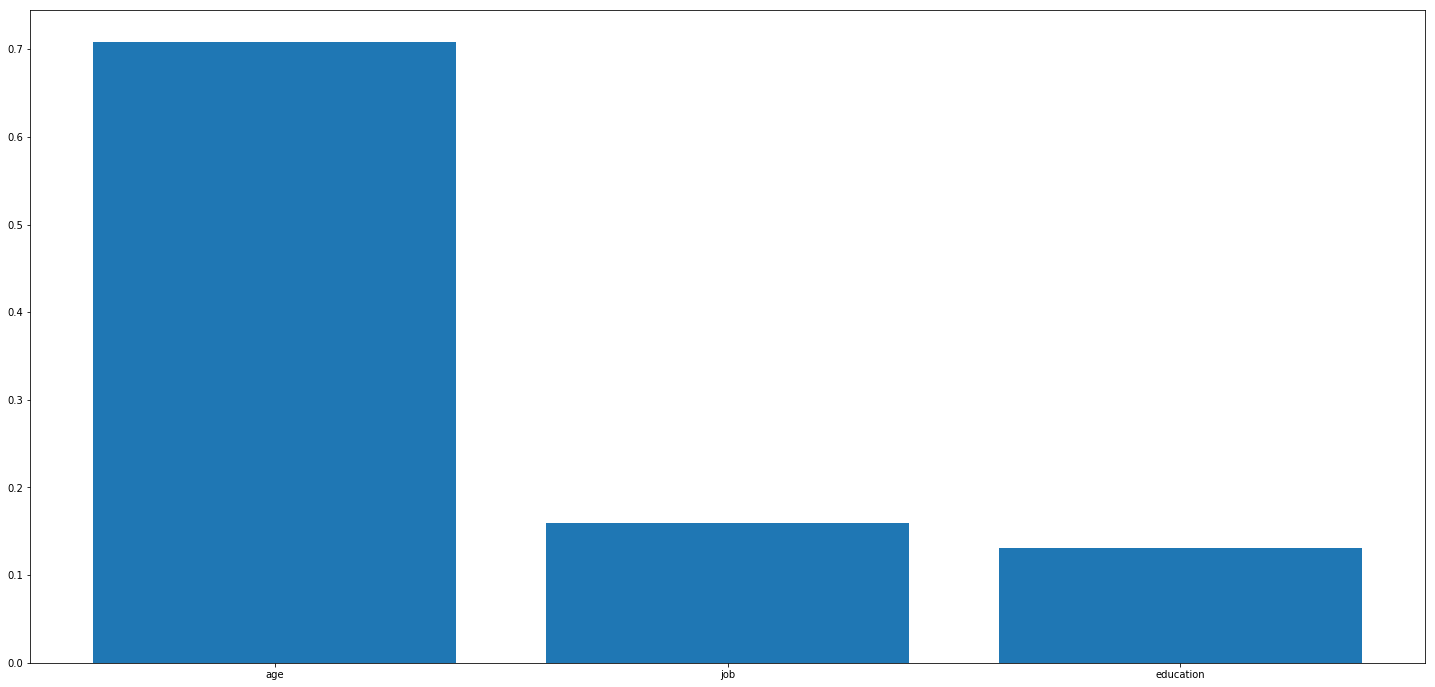

In [125]:
############# job ##############
data_job = filtered_data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_job=fact_rize(data_job)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_job,'job',9)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_job = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_job)

###Job_final###
predicts_job_final = convert_pred('job',predicts_job)
#(data[data.job=='unknown']) =predicts_job_final

############# marital ##############

#Copying the orignial dataset
data_marital = filtered_data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_marital=fact_rize(data_marital)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_marital,'marital',3)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_marital = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_marital)

###Marital_final###
predicts_marital_final = convert_pred('marital',predicts_marital)
#(data[data.marital=='unknown']) =predicts_marital_final

############# education ##############

#Copying the orignial dataset
data_education = filtered_data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_education=fact_rize(data_education)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_education,'education',5)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_education = rand_forest(Xtrain,ytrain,Xtest)

predicts_education

##Education_final###
predicts_education_final = convert_pred('education',predicts_education)
#(data[data.education=='unknown']) =predicts_education_final

############# housing ##############

#Copying the orignial dataset
data_housing = filtered_data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_housing=fact_rize(data_housing)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_housing,'housing',2)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_housing = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_housing)

##Housing_final###
predicts_housing_final = convert_pred('housing',predicts_housing)
#(data[data.housing=='unknown']) =predicts_housing_final

############# loan ##############

#Copying the orignial dataset
data_loan = filtered_data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_loan=fact_rize(data_loan)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_loan,'loan',2)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_loan = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_loan)

##Loan_final###
predicts_loan_final = convert_pred('loan',predicts_loan)
#(data[data.loan=='unknown']) =predicts_loan_final

In [127]:
data_new = filtered_data.copy()

(data_new[data_new.job=='unknown']['job']) =predicts_job_final
(data_new[data_new.marital=='unknown']['marital']) =predicts_marital_final
(data_new[data_new.education=='unknown']['education']) =predicts_education_final
(data_new[data_new.housing=='unknown']['housing']) =predicts_housing_final
(data_new[data_new.loan=='unknown']['loan']) =predicts_loan_final

C:\Users\rujulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rujulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rujulk\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

In [161]:
len(data_new[data_new['y']=='yes'])
new_list += random.sample(old_list, 5)

NameError: name 'new_list' is not defined

In [160]:
len(data_new[data_new['y']=='yes'])

4617

In [162]:
y_cases=(data_new[data_new['y']=='yes'])
n_cases=(data_new[data_new['y']=='no'])

In [163]:
y_id = y_cases['id']
n_id = n_cases['id']


In [164]:
import random
y_list_chosen = random.sample(y_id.tolist(), 923)
n_list_chosen = random.sample(n_id.tolist(), 7248)

type(y_cases['id'])
y_series_chosen = pd.Series(  y_list_chosen) 
n_series_chosen = pd.Series(  n_list_chosen)

y_data_chosen20 = y_cases[y_cases['id'].isin(y_series_chosen)].copy()
y_data_chosen80 = y_cases[-(y_cases['id'].isin(y_series_chosen))].copy()

n_data_chosen20 = n_cases[n_cases['id'].isin(n_series_chosen)].copy()
n_data_chosen80 = n_cases[-(n_cases['id'].isin(n_series_chosen))].copy()

#y_data_chosen80 = y_cases[-(y_cases['id']==y_list_chosen)].copy()

# n_data_chosen20 = n_cases[n_cases['id']==n_list_chosen].copy()
# n_data_chosen80 = n_cases[-(n_cases['id']==n_list_chosen)].copy()
test_20 = [y_data_chosen20, n_data_chosen20]
train_80 = [y_data_chosen80, n_data_chosen80]
result_test = pd.concat(test_20)
result_train = pd.concat(train_80)


In [158]:
len(result_train)
filtered_data_prune_1 = result_train[~((result_train.pdays==999) & (result_train.poutcome=='failure'))].copy()

In [159]:
#Dropping rows with column > 25
filtered_data_prune_2 = filtered_data_prune_1.drop(filtered_data_prune_1[filtered_data_prune_1.campaign>25].index).copy()

In [165]:
#unpruned and imputed
data_new.to_csv('unpruned_nd_mputed.csv')
#test
result_test.to_csv('test.csv')
#pruned and unimputed
filtered_data_prune_2.to_csv('pruned_and_nimputed.csv')

In [151]:
n_list_chosen

[19048,
 38130,
 24839,
 39332,
 19696,
 22961,
 30433,
 25926,
 23877,
 4127,
 1898,
 37423,
 1827,
 32086,
 18428,
 40316,
 20445,
 3961,
 7979,
 27800,
 5153,
 21795,
 9291,
 32754,
 15119,
 28420,
 12614,
 25630,
 25651,
 11781,
 6911,
 3696,
 22218,
 595,
 34599,
 32446,
 24730,
 16383,
 32939,
 32429,
 24656,
 24891,
 36226,
 19309,
 3027,
 31890,
 23718,
 24453,
 29257,
 25145,
 31904,
 33440,
 13424,
 40613,
 2188,
 6361,
 27885,
 5281,
 10870,
 21306,
 29269,
 36925,
 1948,
 27464,
 19177,
 36918,
 15104,
 9183,
 14083,
 25561,
 8934,
 33868,
 37359,
 1368,
 27265,
 32610,
 18080,
 34486,
 21799,
 32461,
 6315,
 11993,
 33058,
 21685,
 15293,
 4128,
 21126,
 17807,
 36565,
 33758,
 34933,
 7078,
 12000,
 35391,
 96,
 26160,
 32169,
 38135,
 35994,
 18228,
 26058,
 3445,
 22981,
 14433,
 36126,
 1573,
 14189,
 25754,
 31667,
 33447,
 17494,
 21585,
 38219,
 37477,
 6840,
 3752,
 35332,
 25276,
 32039,
 39997,
 8973,
 2824,
 12873,
 11043,
 3932,
 15484,
 7066,
 6683,
 38944,
 1

In [ ]:
data_new[data_new.job=='unknown']['job']

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


80

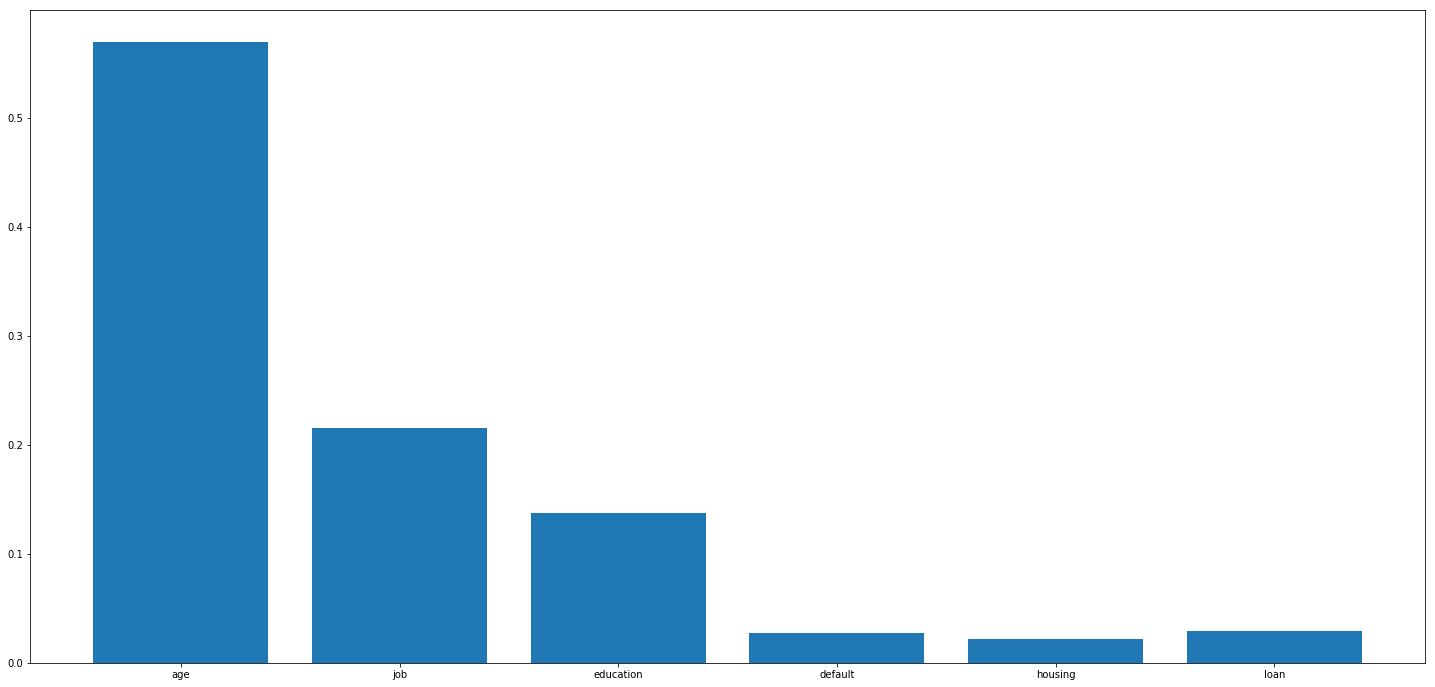

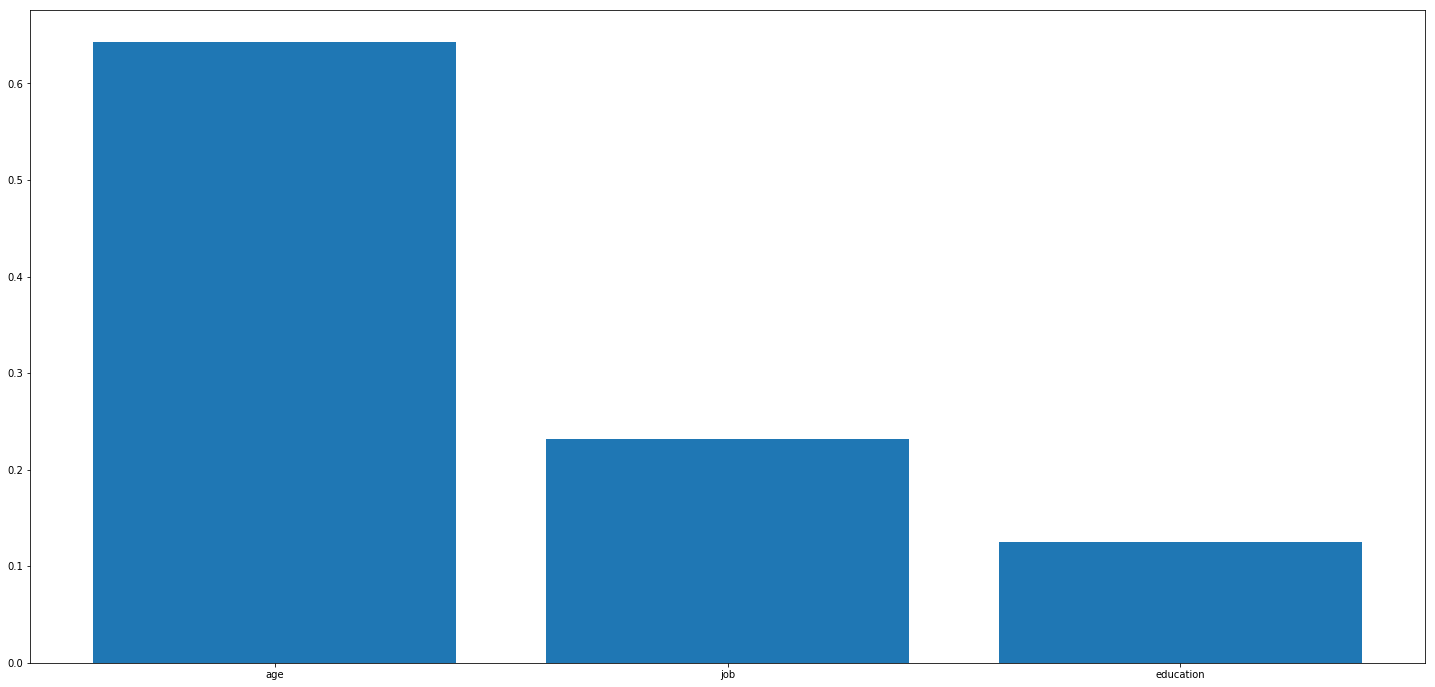

In [103]:
############# marital ##############

#Copying the orignial dataset
data_marital = data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_marital=fact_rize(data_marital)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_marital,'marital',3)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_marital = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_marital)

In [97]:
predicts_marital_final = convert_pred('marital',predicts_marital)
#(data[data.marital=='unknown']) =predicts_marital_final

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


array([3, 3, 4, ..., 4, 4, 0], dtype=int64)

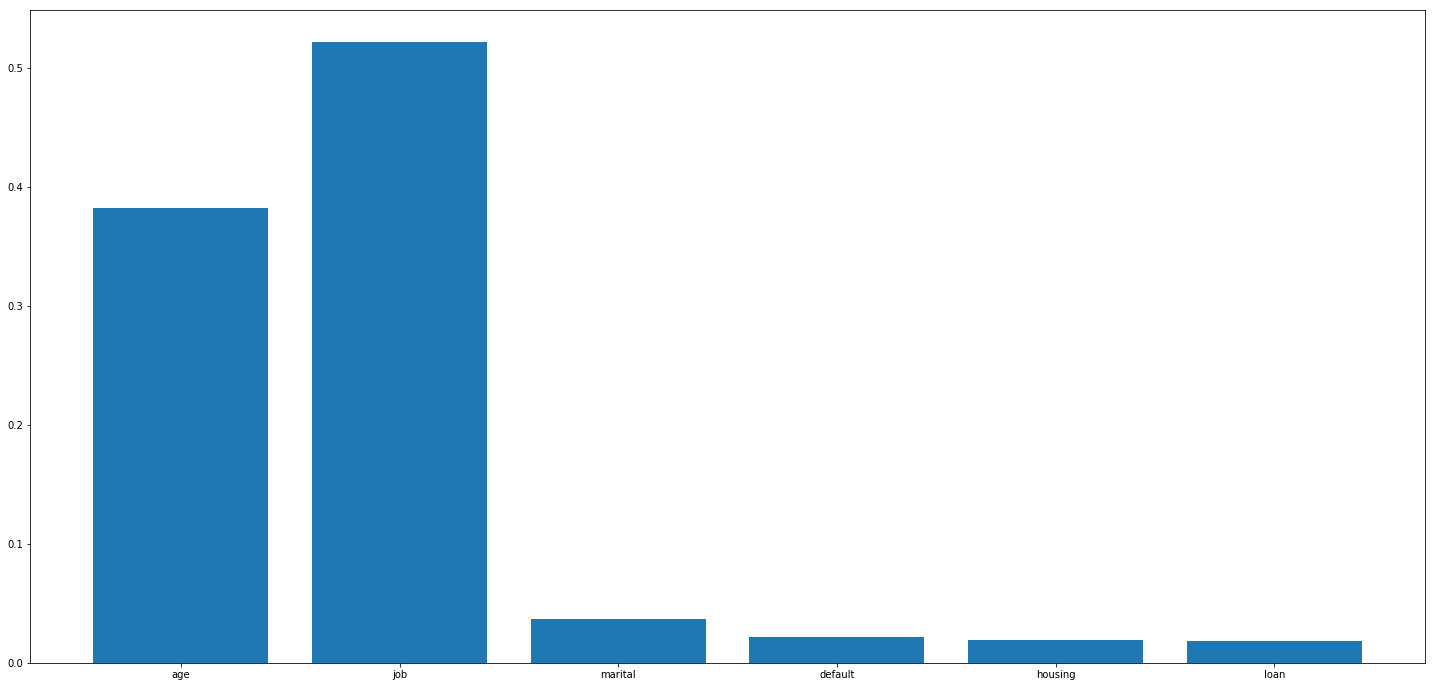

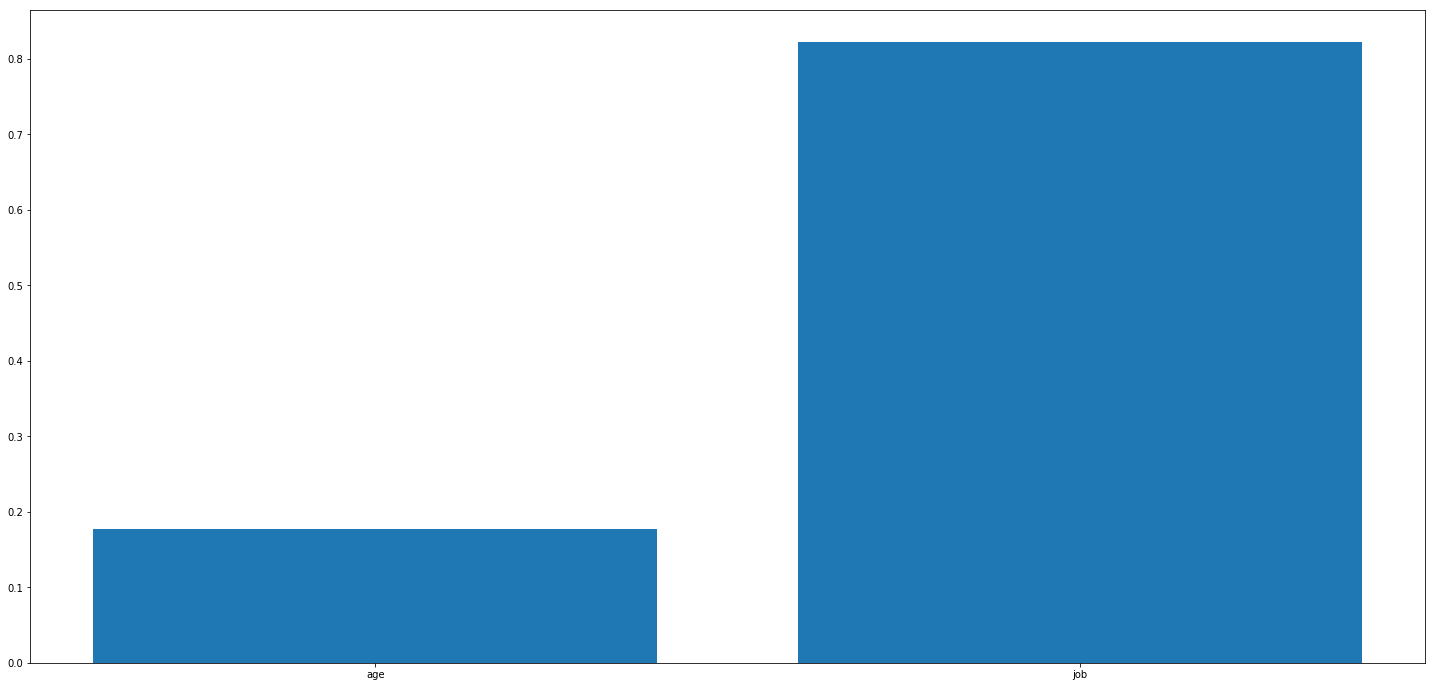

In [105]:
############# education ##############

#Copying the orignial dataset
data_education = data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_education=fact_rize(data_education)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_education,'education',5)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_education = rand_forest(Xtrain,ytrain,Xtest)

predicts_education

In [108]:
predicts_education_final = convert_pred('education',predicts_education)
#(data[data.education=='unknown']) =predicts_education_final

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


990

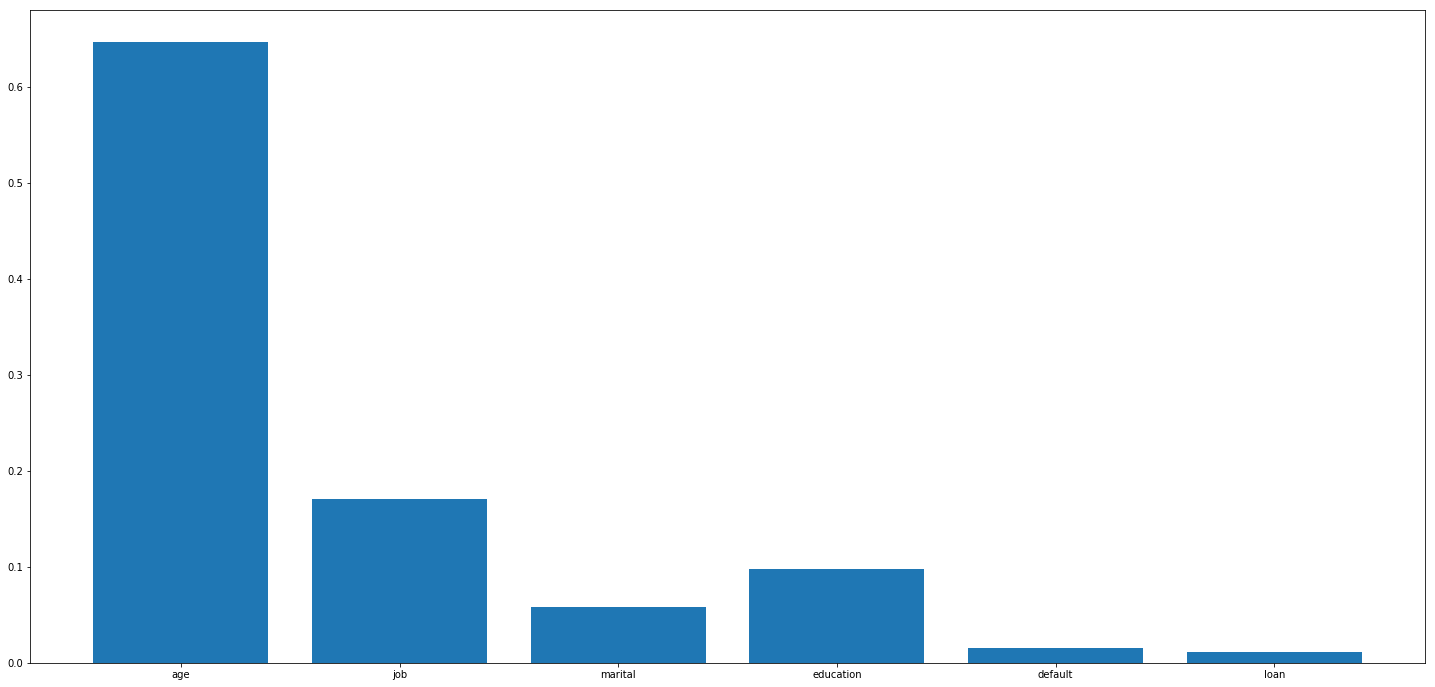

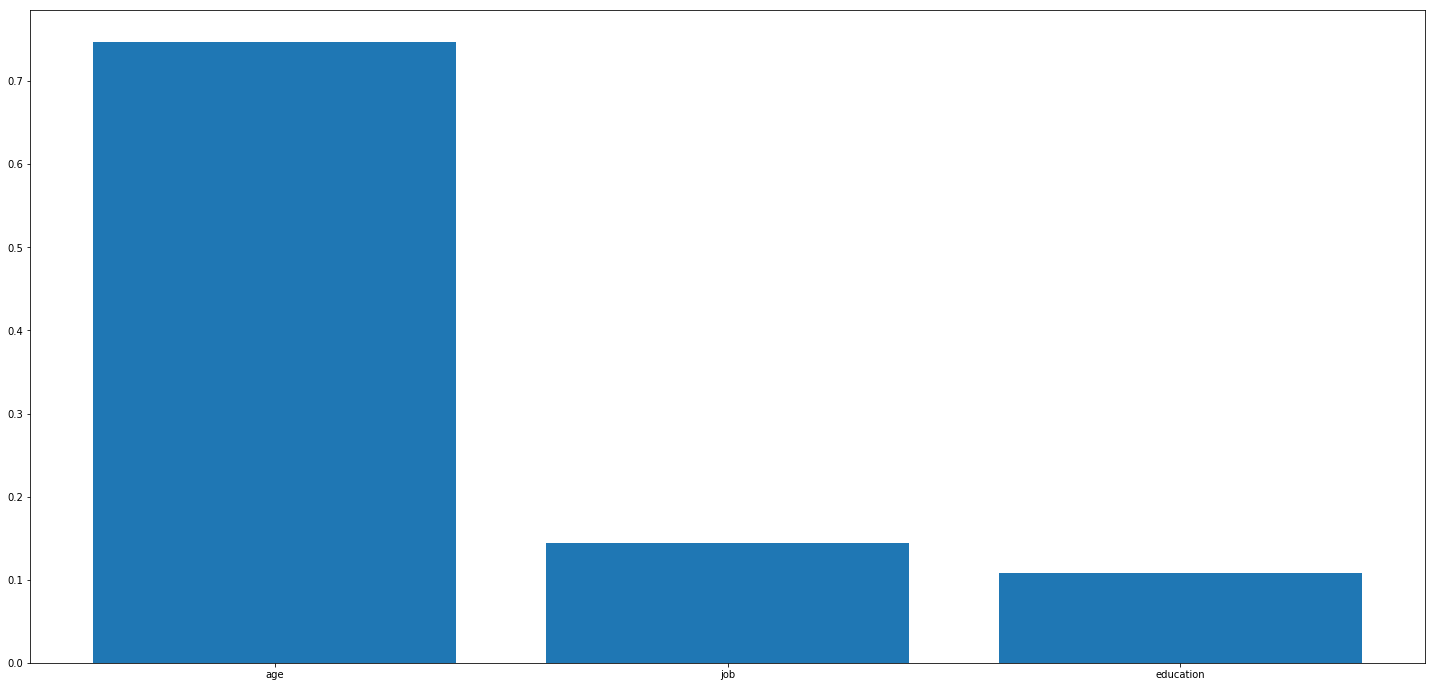

In [109]:
############# housing ##############

#Copying the orignial dataset
data_housing = data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_housing=fact_rize(data_housing)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_housing,'housing',2)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_housing = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_housing)

In [110]:
predicts_housing_final = convert_pred('housing',predicts_housing)
#(data[data.housing=='unknown']) =predicts_housing_final

label_mapping is  :  {'job': Index(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'],
      dtype='object'), 'marital': Index(['married', 'single', 'divorced', 'unknown'], dtype='object'), 'education': Index(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'],
      dtype='object'), 'default': Index(['no', 'unknown', 'yes'], dtype='object'), 'housing': Index(['no', 'yes', 'unknown'], dtype='object'), 'loan': Index(['no', 'yes', 'unknown'], dtype='object')}


990

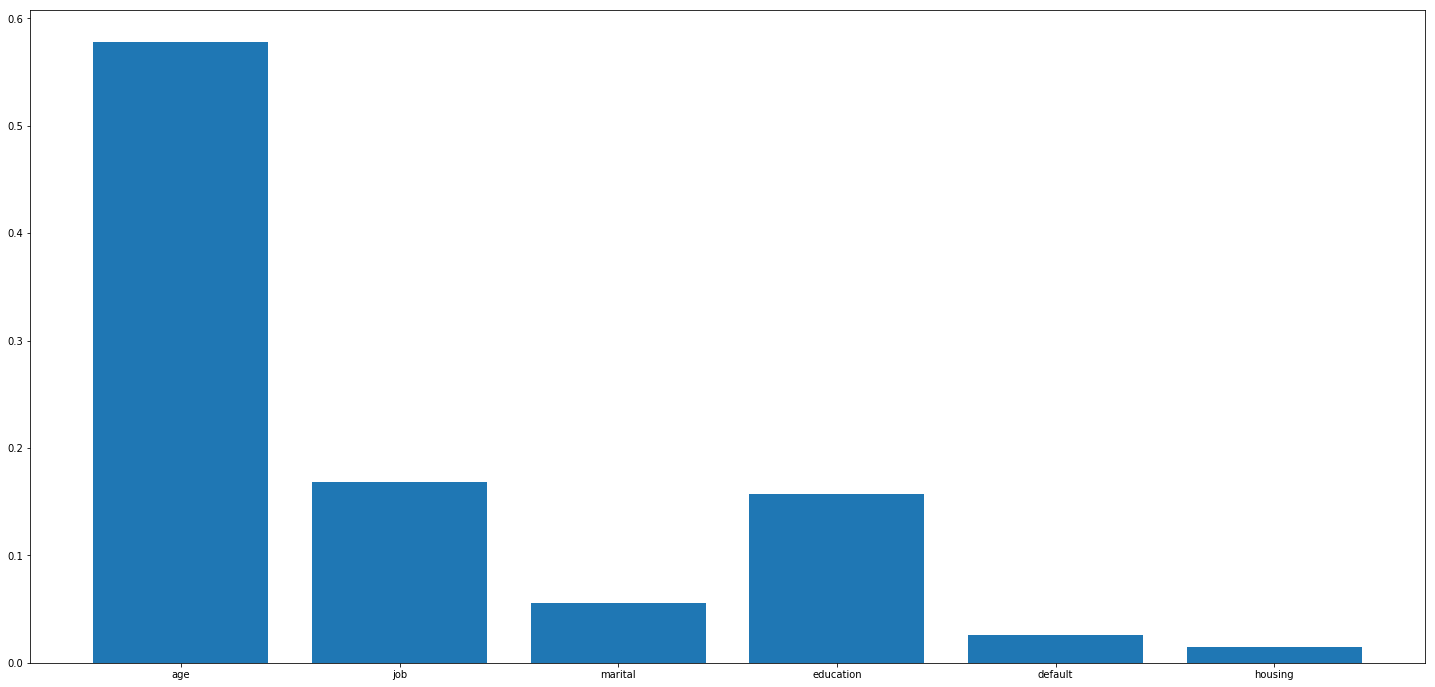

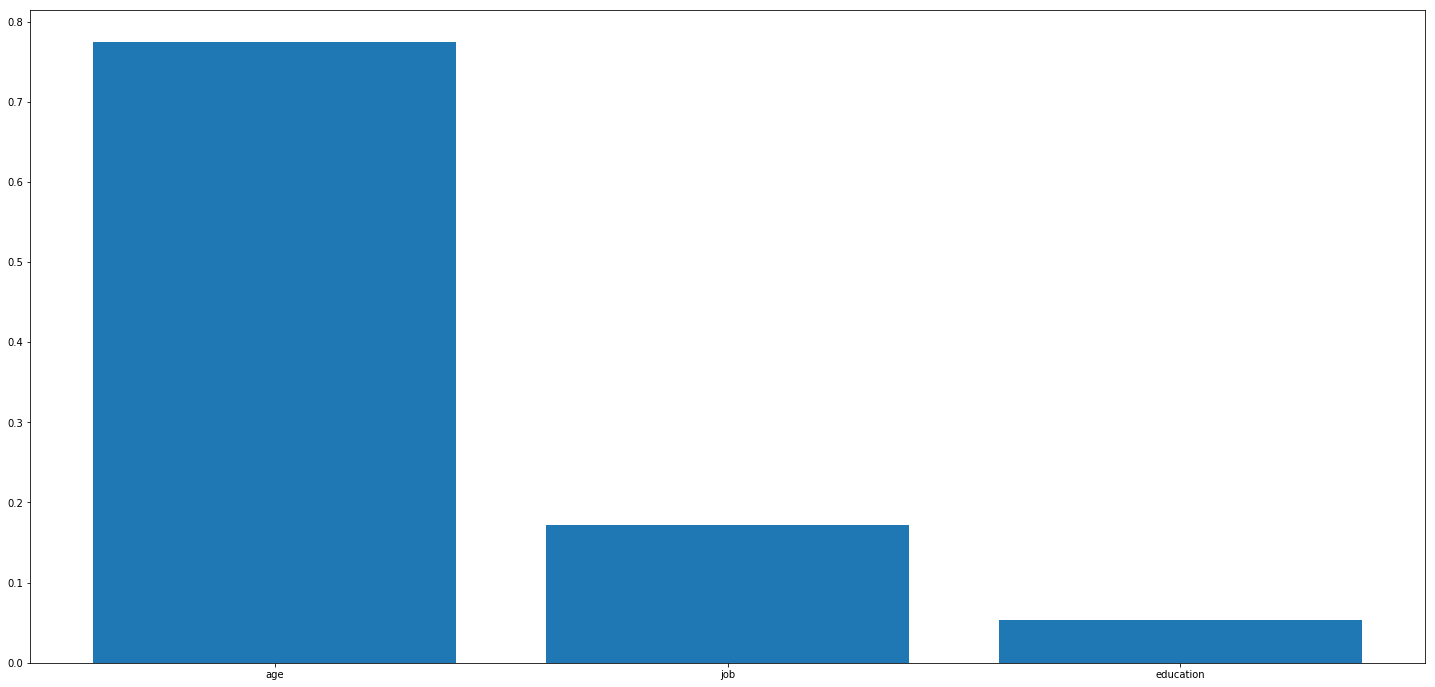

In [111]:
############# loan ##############

#Copying the orignial dataset
data_loan = data[['age','job','marital','education','default','housing','loan']].copy()

#Factorize
data_loan=fact_rize(data_loan)

#Job
ytest,ytrain,Xtest,Xtrain = split_data(data_loan,'loan',2)

rand_forest(Xtrain,ytrain,Xtest)

C=['age','job','education']

Xtrain, Xtest = new_split_c(C,Xtrain,Xtest)

predicts_loan = rand_forest(Xtrain,ytrain,Xtest)

len(predicts_loan)

In [ ]:
predicts_loan_final = convert_pred('loan',predicts_loan)
#(data[data.loan=='unknown']) =predicts_loan_final